In [486]:
from trainUMAP import *
sylla_list = np.load('../4-Results/bengal/0926/pre/sylla_list.npy')
wav_list = np.load('../4-Results/bengal/0926/pre/wav_list.npy')
dur=sylla_list[:,2]
name_idx=sylla_list[:,0]
wav_list.shape, name_idx

((3210,), array([   0,    0,    0, ..., 3209, 3209, 3209]))

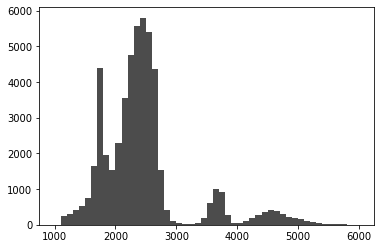

In [98]:
plt.hist(dur, range=(1000,6000),  bins=50, color='black', alpha=0.7)
plt.show()

In [169]:
def hist_duration(lenth, labels, color, g_list, g_legend, xmax=3000, alpha = 0.76, save=None):
    
    a = 1
    for g, c in zip(g_list, color):
        lenth_g = lenth[np.array(labels)==g]
        plt.hist(lenth_g, color=c, bins=50, range=(1000,xmax), alpha=alpha)
    
    plt.legend(g_legend)
    if save!=None:
        plt.savefig(save)
    plt.show()


## UMAP only

In [60]:
x = Projection('../4-Results/bengal/0926/umap/x_flatten.npy')

lat shape:  (51721, 8192) path:  ../4-Results/bengal/0926/umap//


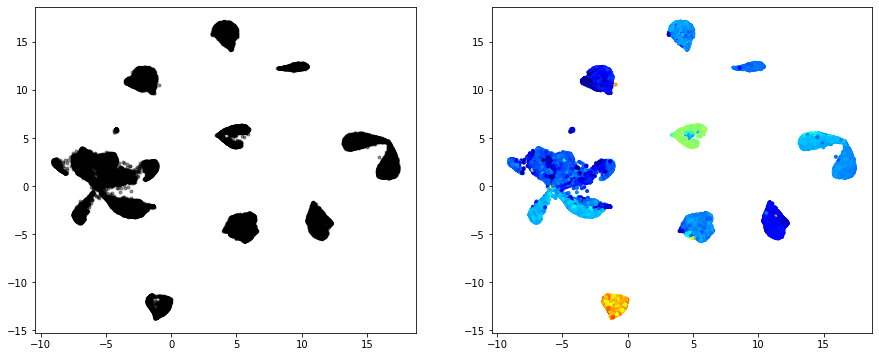

In [73]:
x.umap_n50 = x.umap_embedding()
plot_project(x.umap_n50, dur, save='%s/plot_projection'%x.path)

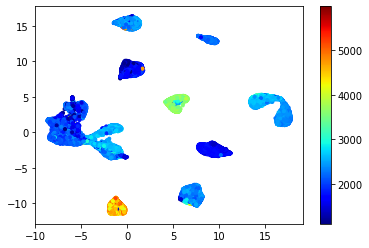

In [422]:
dur.shape, x.umap.shape
c = plt.scatter(x.umap[:, 0], x.umap[:, 1], c=dur, cmap='jet', marker='.')
plt.colorbar(c)

(51721, 2)


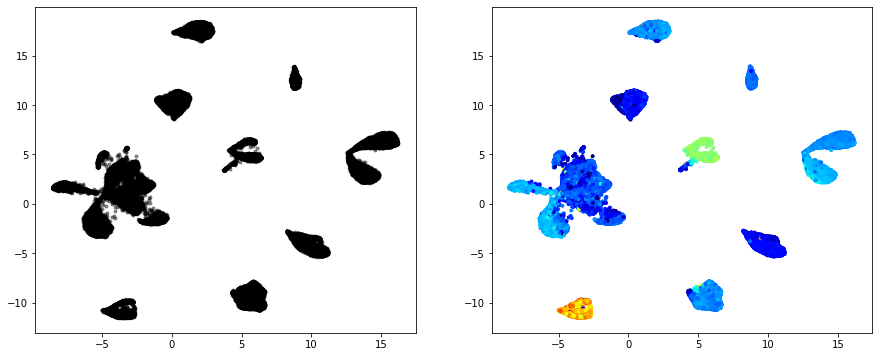

In [76]:
x.umap2 = x.umap_embedding()
plot_project(x.umap2, dur, save='%s/plot_projection'%x.path)

(51721, 2)


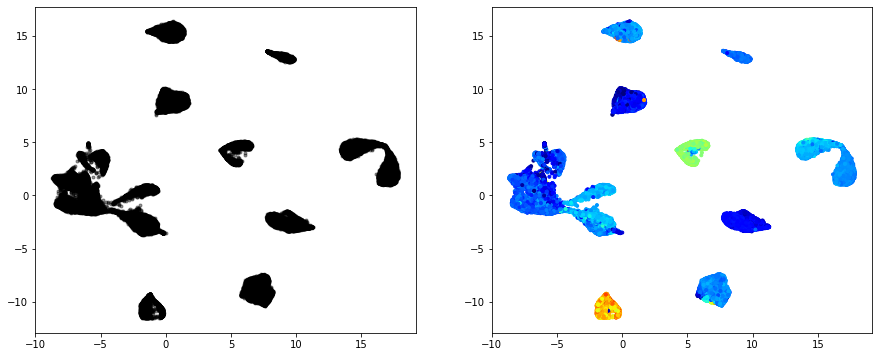

In [78]:
x.umap = x.umap_embedding()
plot_project(x.umap, dur, save='%s/plot_projection'%x.path)

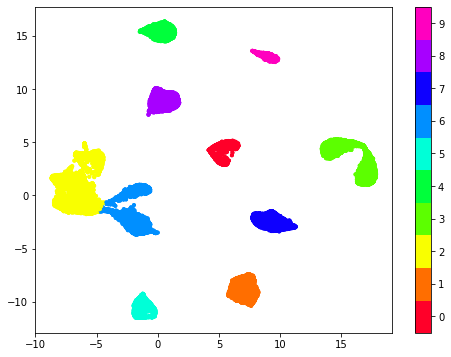

In [145]:
labels = x.get_kmeans_labels(10)
plot_cluster(x.umap, labels)

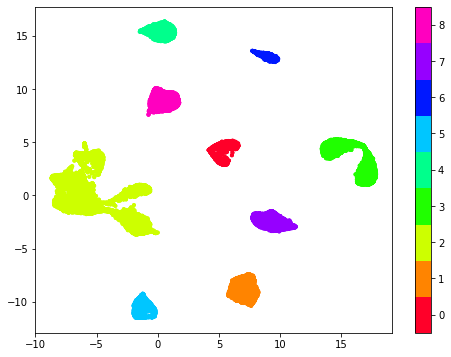

In [153]:
x.labels = [2 if i==6 else i for i in labels]
x.labels = [6 if i==9 else i for i in x.labels]
plot_cluster(x.umap, x.labels, '%s/plot_cluster'%x.path)

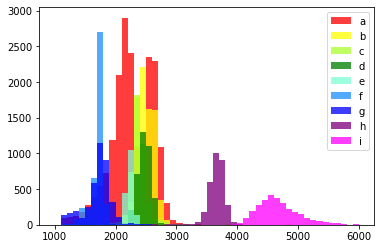

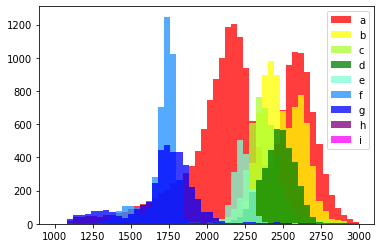

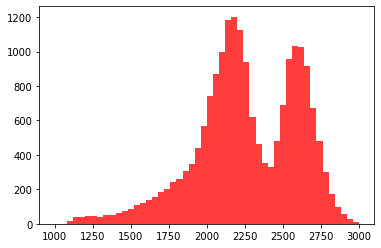

In [175]:
g_list = [2,3,1,4,6,7,8,0,5]
g_index= ['a', 'b', 'c', 'd', 'e','f','g','h','i']
color = ['r', 'yellow', 'greenyellow', 'green', 'aquamarine', 'dodgerblue', 'blue', 'purple', 'magenta']
hist_duration(dur, x.labels, color, g_list, g_index, xmax=6000, save='%s/plot_lenth'%x.path)
hist_duration(dur, x.labels, color, g_list, g_index, xmax=3000, save='%s/plot_lenth_3000'%x.path)



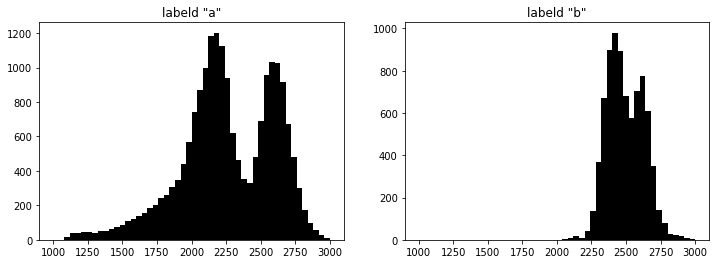

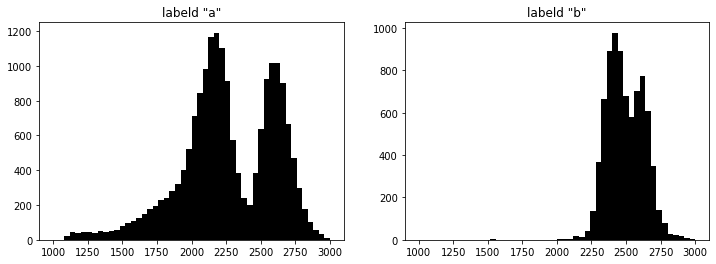

In [430]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
lenth_g = dur[np.array(x.labels)==2]
plt.hist(lenth_g, color='black', bins=50, range=(1000,3000))
plt.title('labeld "a"')

plt.subplot(1,2,2)
lenth_g = dur[np.array(x.labels)==3]
plt.hist(lenth_g, color='black', bins=50, range=(1000,3000))
plt.title('labeld "b"')
plt.show()  


plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
lenth_g = dur[np.array(z10.labels)==2]
plt.hist(lenth_g, color='black', bins=50, range=(1000,3000), alpha=1)
lenth_g = dur[np.array(z10.labels)==5]
plt.hist(lenth_g, color='black', bins=50, range=(1000,3000), alpha=1)
plt.title('labeld "a"')

plt.subplot(1,2,2)
lenth_g = dur[np.array(z10.labels)==1]
plt.hist(lenth_g, color='black', bins=50, range=(1000,3000), alpha=1)
plt.title('labeld "b"')
plt.show()  

In [270]:
g_list = np.array([2,3,1,4,6,7,8,0,5])
g_index= np.array(['a', 'b', 'c', 'd', 'e','f','g','h','i'])
x.glabel=[]
for label in x.labels:
    idx = np.where(g_list==label)
    #print(label, g_index[idx])
    x.glabel.append(g_index[idx][0])
x.glabel = np.array(x.glabel)
len(x.glabel)

51721

## VAE-z=10

In [55]:
z10 = Projection('../4-Results/bengal/0926/lat10/x_lat.npy')

lat shape:  (51721, 10) path:  ../4-Results/bengal/0926/lat10//


(51721, 2)


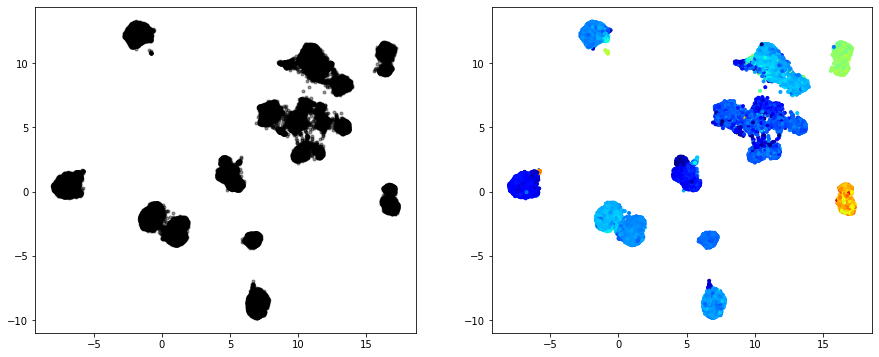

In [124]:
z10.umap = z10.umap_embedding()
plot_project(z10.umap, dur, '%s/plot_projectioln'%z10.path)

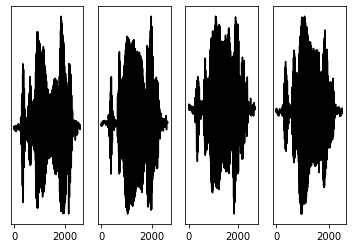

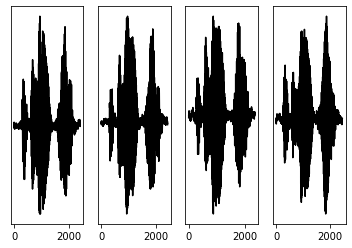

In [529]:

from scipy.io import wavfile
xran=4

for i in range(xran):
    info = sylla_list[mask1][i+5]
    wav = wav_list[info[0]]
    x, y = wavfile.read(wav)
    y=y[info[1]:info[1]+info[2]]
    plt.subplot(1,xran,i+1)
    #plt.xticks([])
    plt.yticks([])
    plt.plot(y, c='k')
plt.show()

for i in range(xran):
    info = sylla_list[mask2][i+5]
    wav = wav_list[info[0]]
    x, y = wavfile.read(wav)
    y=y[info[1]:info[1]+info[2]]
    plt.subplot(1,xran,i+1)
    #plt.xticks([])
    plt.yticks([])
    plt.plot(y, c='k')
plt.show()

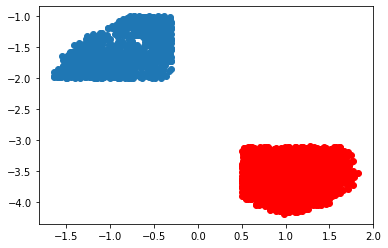

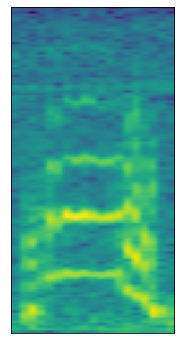

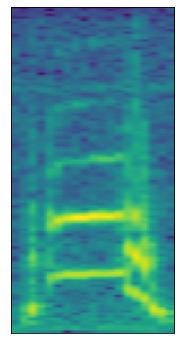

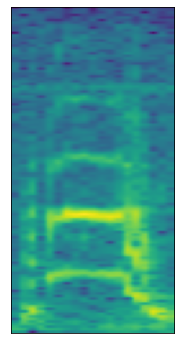

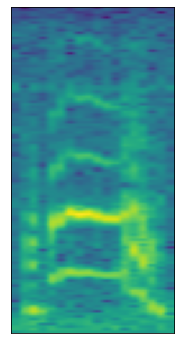

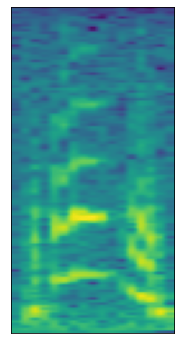

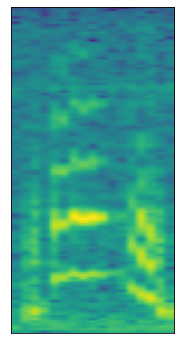

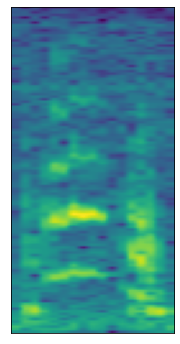

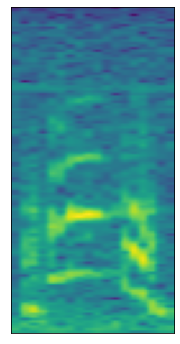

In [535]:
mask1=(z10.umap[:,0]<-0.3) & (z10.umap[:,1]<-1 )&(z10.umap[:,1]>-2)
mask2=(z10.umap[:,0]<2) & (z10.umap[:,1]<-3.1) &(z10.umap[:,0]>0.5)

b1=z10.umap[mask1]
b2=z10.umap[mask2]
plt.scatter(b1[:,0], b1[:,1])
plt.scatter(b2[:,0], b2[:,1], c='r')
plt.show()


for i in range(4):
    plt.figure(figsize=(4,6))
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(data[mask1][i+5])
    plt.savefig('./mask1_%i'%i)
    plt.show()


for i in range(4):
    plt.figure(figsize=(4,6))

    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(data[mask2][i+5])
    plt.savefig('./mask2_%i'%i)
    plt.show()

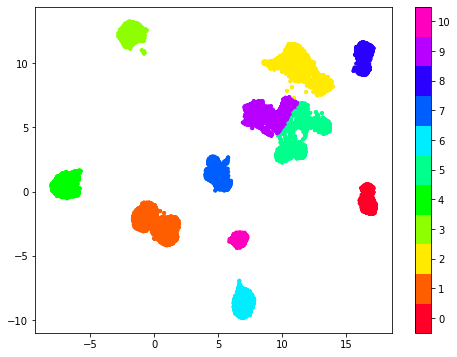

In [127]:
labels = z10.get_kmeans_labels(11)
plot_cluster(z10.umap, labels)

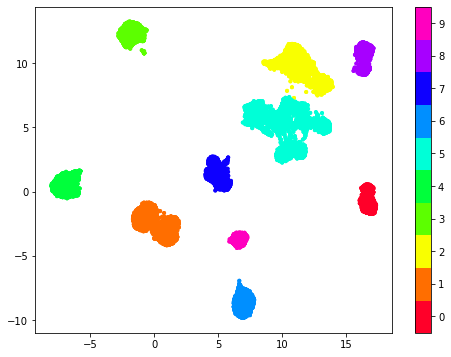

In [130]:
z10.labels = [5 if i==9 else i for i in labels]
z10.labels = [9 if i==10 else i for i in z10.labels]
plot_cluster(z10.umap, z10.labels, '%s/plot_cluster'%z10.path)

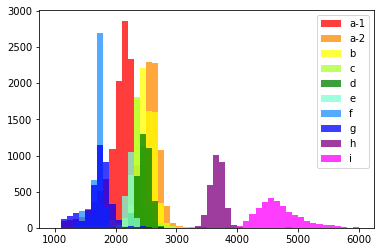

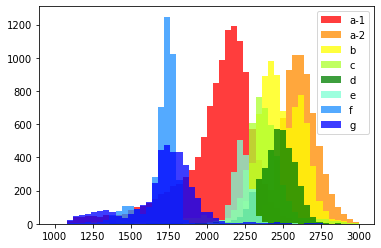

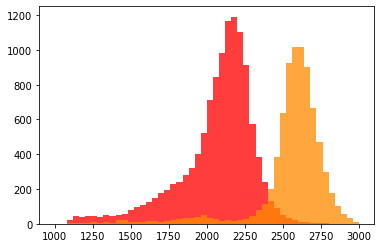

In [176]:
g_list = [5,2,1,3,6,9,4,7,8,0]
g_index= ['a-1', 'a-2', 'b', 'c', 'd', 'e','f','g','h','i']

color = ['r', 'darkorange', 'yellow', 'greenyellow', 'green', 'aquamarine', 'dodgerblue', 'blue', 'purple', 'magenta']
hist_duration(dur, z10.labels, color, g_list, g_index, xmax=6000, save='%s/plot_lenth'%z10.path)
hist_duration(dur, z10.labels, color, g_list, g_index[:8], xmax=3000, save='%s/plot_lenth_3000'%z10.path)

plt.hist(dur[np.array(z10.labels)==5], color='r', bins=50, range=(1000,3000), alpha=0.76)
plt.hist(dur[np.array(z10.labels)==2], color='darkorange', bins=50, range=(1000,3000), alpha=0.76)
plt.show()  

In [184]:
data = np.load('../4-Results/bengal/0926/pre/data.npy')
data.shape


(51721, 128, 64)

In [234]:
g_list = np.array([5,2,1,3,6,9,4,7,8,0])
g_index= np.array(['a-1', 'a-2', 'b', 'c', 'd', 'e','f','g','h','i'])
z10.glabel=[]
for label in z10.labels:
    idx = np.where(g_list==label)
    #print(label, g_index[idx])
    z10.glabel.append(g_index[idx][0])
z10.glabel = np.array(z10.glabel)
len(z10.glabel)

51721

In [383]:
def plot_group_img(data, glabel, save=None):
    def plot_img(img, title=None):
        plt.yticks([])
        plt.xticks([])
        plt.title(title)
        plt.imshow(img, cmap='gray')

    
    labels = list(set(glabel))
    labels.sort()
    for label in labels:
        g_data = data[glabel==label]
        
        w, h = 8,2
        figure = plt.figure(figsize=(w*1.5,h*1.5))

        for idx in range(w):

            plt.subplot(1,w,idx+1)
            plot_img(g_data[idx], title=label)

        if save!=None:
            plt.savefig(save+'_%s'%label)
    plt.show()
    
def plot_group_scatter(data, glabel, colors, save=None):
    labels = list(set(glabel))
    labels.sort()
    
    plt.figure(figsize=(7,6))
    for label, color in zip(labels, colors):
        g_data = data[glabel==label]
        plt.scatter(g_data[:,0], g_data[:,1], marker='.', c= color)
    
    plt.legend(labels)    
       
    if save!=None:
        plt.savefig(save+'_%s'%label)
    
    plt.show()
    
def plot_all_group(data, glabel, save=None):
    def plot_img(img, title=None):
        plt.yticks([])
        plt.xticks([])
        plt.title(title)
        plt.imshow(img, cmap='gray')

    
    labels = list(set(glabel))
    labels.sort()
    idx=1

    figure = plt.figure(figsize=(12,6))
    for label in labels:
        g_data = data[glabel==label]
        


        plt.subplot(1,len(labels),idx)
        plot_img(g_data[1], title=label)
        
        idx=idx+1
    if save!=None:
        plt.savefig(save)
    plt.show()

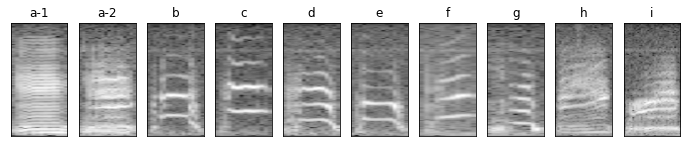

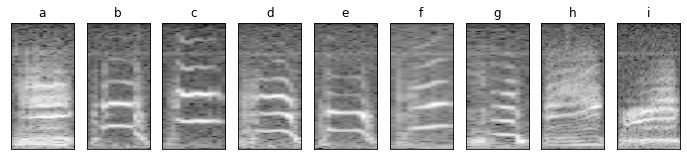

In [385]:
plot_all_group(data, z10.glabel, save='%s/plot_allg'%z10.path)
plot_all_group(data, x.glabel, save='%s/plot_allg'%x.path)

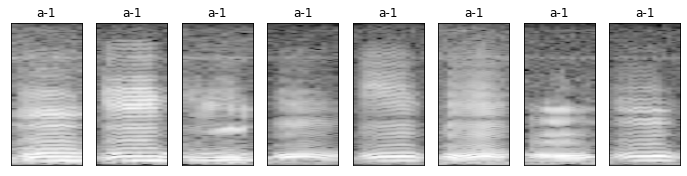

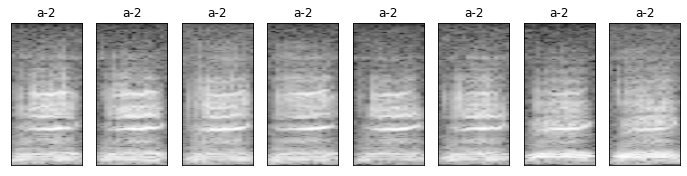

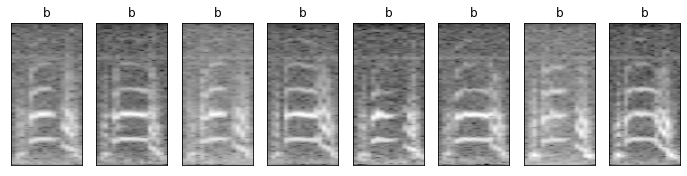

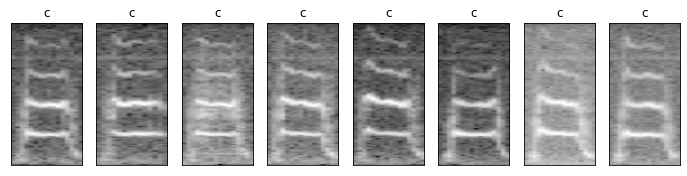

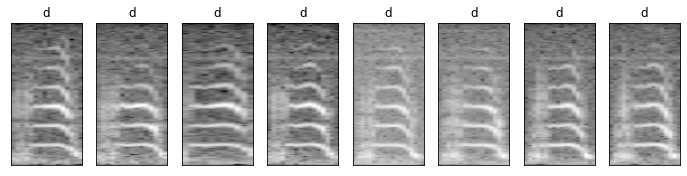

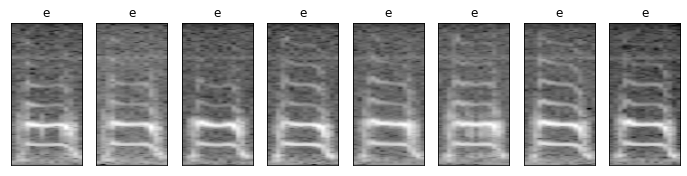

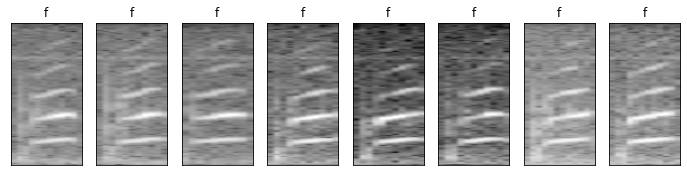

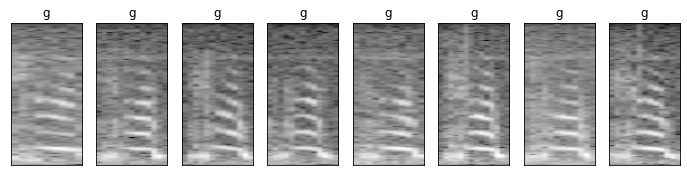

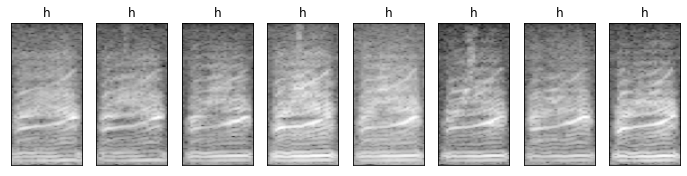

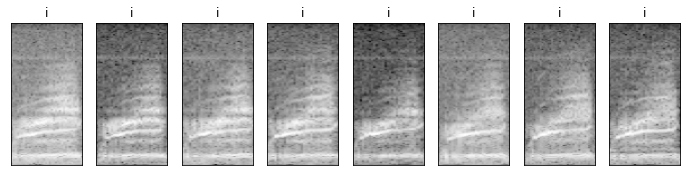

In [363]:
plot_group_img(data, z10.glabel, save='%s/plot_gg'%z10.path)

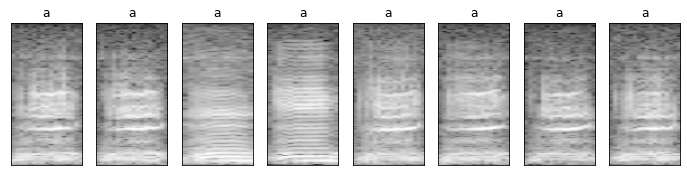

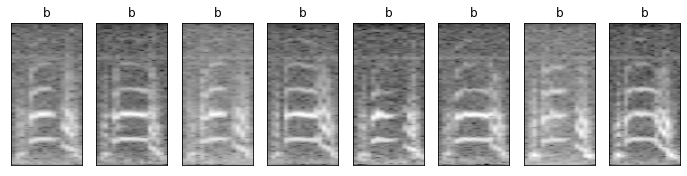

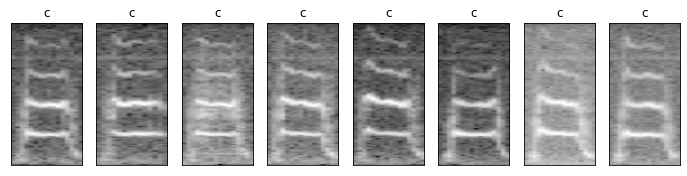

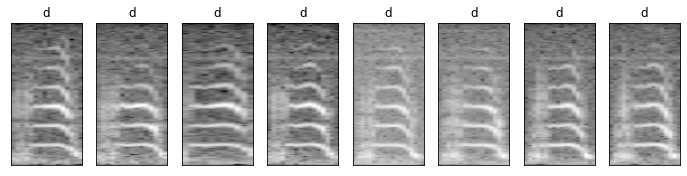

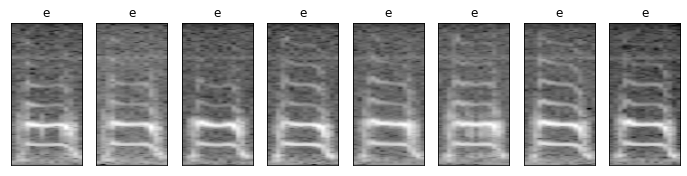

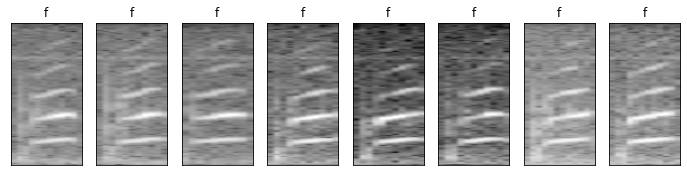

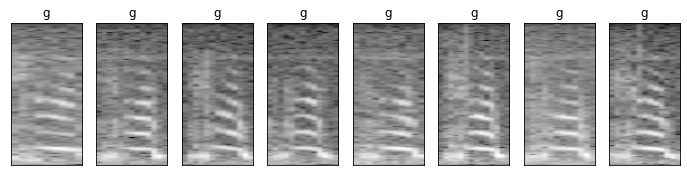

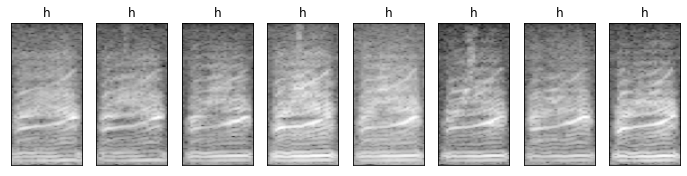

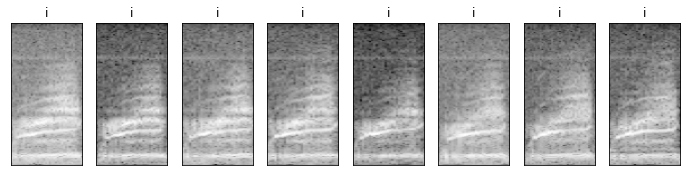

In [365]:
plot_group_img(data, x.glabel, save='%s/plot_gg'%x.path)

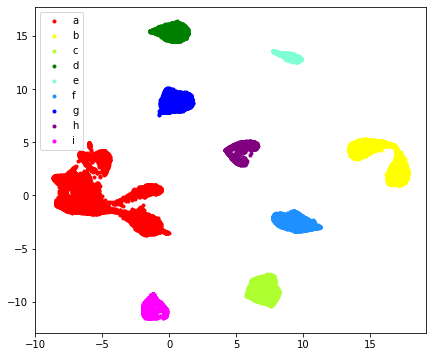

In [339]:
x.colors = ['r', 'yellow', 'greenyellow', 'green', 'aquamarine', 'dodgerblue', 'blue', 'purple', 'magenta']
plot_group_scatter(x.umap, x.glabel, x.colors, save='%s/plot_gScatter'%x.path)

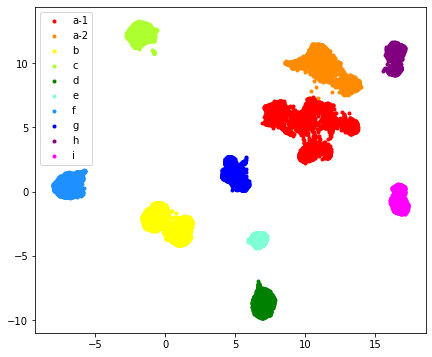

In [340]:
z10.colors = ['r', 'darkorange', 'yellow', 'greenyellow', 'green', 'aquamarine', 'dodgerblue', 'blue', 'purple', 'magenta']
plot_group_scatter(z10.umap, z10.glabel, z10.colors, save='%s/plot_gScatter'%z10.path)

In [299]:
z10.umap.shape

(51721, 2)

## VAE_z100

In [284]:
z100 = Projection('../4-Results/bengal/0926/lat100/x_lat.npy')

lat shape:  (51721, 100) path:  ../4-Results/bengal/0926/lat100//


(51721, 2)


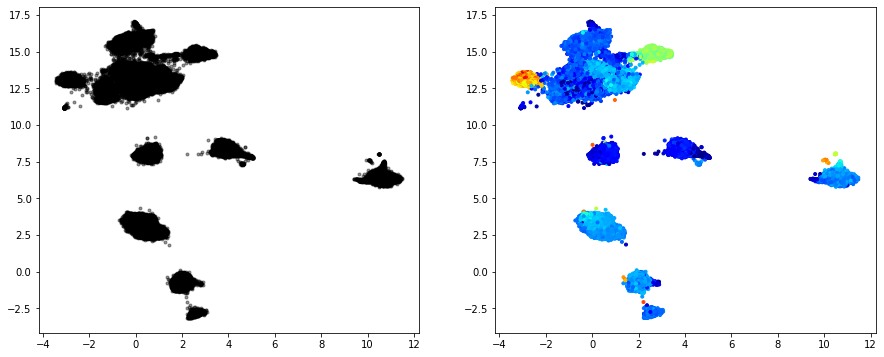

In [364]:
z100.umap = z100.umap_embedding()


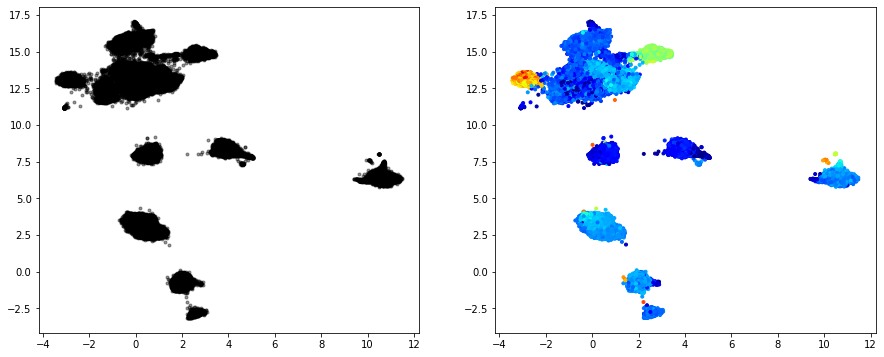

In [439]:
plot_project(z100.umap, dur, z100.path+'/plot_projection')

## VAE-z=2

In [436]:
z2 = Projection('../4-Results/bengal/0926/lat2/x_lat.npy')

lat shape:  (51721, 2) path:  ../4-Results/bengal/0926/lat2//


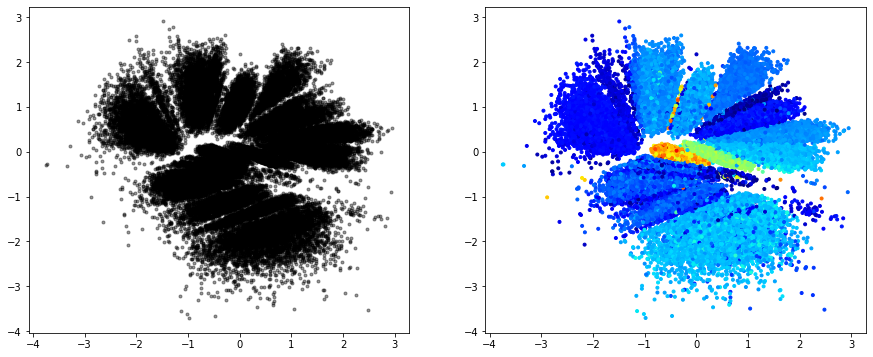

In [438]:
plot_project(z2.z, dur, z2.path+'/plot_projection')